importing labraries

In [114]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)


importing data and scalling 


In [107]:
data = load_iris()
x = data.data
y = data.target
scaler = StandardScaler()
x = scaler.fit_transform(x)


splitting data

In [88]:
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.2 , random_state=23)

preparing the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9667 - loss: 0.0817
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
sample 1.
prediction = 2 | acutal = 2
sample 2.
prediction = 2 | acutal = 2
sample 3.
prediction = 1 | acutal = 1
sample 4.
prediction = 0 | acutal = 0
sample 5.
prediction = 2 | acutal = 2
sample 6.
prediction = 1 | acutal = 1
sample 7.
prediction = 0 | acutal = 0
sample 8.
prediction = 2 | acutal = 2
sample 9.
prediction = 0 | acutal = 0
sample 10.
prediction = 1 | acutal = 1
evaluating model:
loss : 0.08169343322515488 | accuracy : 0.9666666388511658
confusion matrix : 
 [[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]


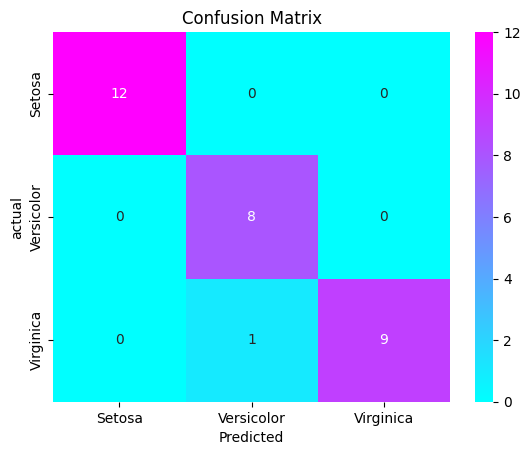

In [118]:
model = keras.Sequential([
    tf.keras.layers.Dense(128  , activation='relu'),
    tf.keras.layers.Dense(3 , activation='softmax') # output layer
])
# compiling 
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
# fitting 
model.fit(x_train , y_train , epochs=100   , validation_split=0.2 , verbose=0) #accuracy: 0.9661 - loss: 0.1156 - val_accuracy: 0.9583 - val_loss: 0.1282

# predictions
loss , acc = model.evaluate(x_test , y_test)
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions , axis=1)
cm = confusion_matrix(y_test , predicted_labels)

# results
for i in range(10):
    predict = np.argmax(predictions[i])
    target = y_test[i]
    print(f"sample {i+1}.\nprediction = {predict} | acutal = {target}")

print("evaluating model:")
print(f"loss : {loss} | accuracy : {acc}")
print("confusion matrix : \n" , cm)

# confusion matrix heat map
labels = ['Setosa', 'Versicolor', 'Virginica']
sns.heatmap(cm , annot=True , fmt='d' , cmap='cool' , xticklabels=labels , yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

# saving model
model.save("NN_iris_data.keras")
